# Assignment8

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [95]:
df = pd.read_csv("car_data.csv")

In [96]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [97]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [98]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [99]:
df = df.drop_duplicates()

# Find the linear regression equation for mileage vs price

In [100]:
x = df[[]]

In [101]:
x = df[['Mileage']]
y = df['Price']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = lr.predict(X_test)

# Chart the original data and the equation on the chart.

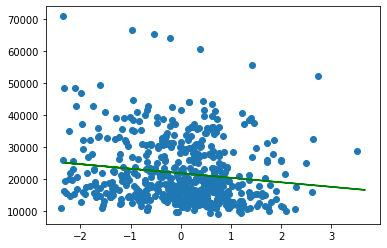

In [106]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color='g')

# Find the equation's  R2  score 

In [107]:
from sklearn import metrics
print('R2-score:',metrics.r2_score(y_test,y_pred))
lr.score(X_test,y_test)

R2-score: 0.001041933777444104


0.001041933777444104

# **Part 2**

## Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation

In [15]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [16]:
col = [i for i in df.columns]
print(col)
new_col = []
new_col.append(col[1])
m = col[6:]
for i in m:
  new_col.append(i)

new_col


['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']

In [17]:
x = df[new_col]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [18]:
X_train.shape, y_test.shape

((562, 7), (242,))

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Find the equation's  R2  score

In [21]:
print("r2-Score : ",reg.score(X_train,y_train))

r2-Score :  0.4668093410396009


### **Find the combination of the factors that is the best predictor for price.**

In [22]:
for i in new_col:
  x = df[[i]]
  y = df["Price"]
  model = LinearRegression()
  model.fit(x,y)
  print(i, ":",model.score(x,y))

Mileage : 0.02046344732348926
Cylinder : 0.32385903759512247
Liter : 0.31152674427904503
Doors : 0.019251466591467037
Cruise : 0.1856330092969276
Sound : 0.015462387624189389
Leather : 0.024710851264124534


# By analyzing the Data and the model the best combinations are Cylinder,Liters and Crusie

In [120]:
one_hot_encoded_data = pd.get_dummies(df, columns = [ 'Make', 'Model', 'Type'])
one_hot_encoded_data.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [117]:
x = one_hot_encoded_data.drop(columns=["Price","Trim"])
y = one_hot_encoded_data['Price']

In [118]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [119]:
regg = LinearRegression()
regg.fit(X_train,y_train)

LinearRegression()

In [121]:
regg.score(X_train,y_train)

0.9818113064402808

In [129]:
col = [i for i in one_hot_encoded_data.columns]
col
new_col = []
new_col.append(col[1])
f = col[3:]
for i in f:
  new_col.append(i)


In [128]:
for i in new_col:
  x = one_hot_encoded_data[[i]]
  y = one_hot_encoded_data["Price"]
  model = LinearRegression()
  model.fit(x,y)
  print(i, ":",model.score(x,y))

Mileage : 0.02046344732348926
Cylinder : 0.32385903759512247
Liter : 0.31152674427904503
Doors : 0.019251466591467037
Cruise : 0.1856330092969276
Sound : 0.015462387624189389
Leather : 0.024710851264124534
Make_Buick : 0.0003156955904867198
Make_Cadillac : 0.43467222055774146
Make_Chevrolet : 0.16369972777296582
Make_Pontiac : 0.020191011838045725
Make_SAAB : 0.11249608486981633
Make_Saturn : 0.04481729286980152
Model_9-2X AWD : 0.0006705949575458447
Model_9_3 : 0.01551727999156971
Model_9_3 HO : 0.044294927303921816
Model_9_5 : 0.02992939459223687
Model_9_5 HO : 0.012235997496740647
Model_AVEO : 0.09268208373129971
Model_Bonneville : 7.927732740453663e-05
Model_CST-V : 0.07236606185907579
Model_CTS : 0.010715368384112356
Model_Cavalier : 0.059386315780149745
Model_Century : 0.003698911729677512
Model_Classic : 0.007741907120061953
Model_Cobalt : 0.03711188670126875
Model_Corvette : 0.08294059063514281
Model_Deville : 0.08811897712425065
Model_G6 : 0.0007473731721009402
Model_GTO : 0.0

# By analyzing the Data and the model the best combinations are Cylinder, Liters, Crusie, and some specfic models and types